### 1. 标准回归函数拟合

In [1]:
import regression

In [2]:
import numpy as np

In [3]:
xArr, yArr = regression.loadDataSet('ex0.txt')

In [4]:
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [5]:
yArr[0:2]

[3.176513, 3.816464]

In [6]:
ws = regression.standRegres(xArr, yArr)

In [7]:
ws

matrix([[ 3.00774324],
        [ 1.69532264]])

In [8]:
xMat = np.mat(xArr)

In [9]:
yMat = np.mat(yArr)

In [10]:
yHat = xMat*ws

In [11]:
import matplotlib.pyplot as plt

In [12]:
fig = plt.figure()

In [13]:
ax = fig.add_subplot(111)

In [14]:
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])

In [15]:
xCopy = xMat.copy()

In [16]:
xCopy.sort(0)

In [17]:
yHat = xCopy * ws

In [18]:
ax.plot(xCopy[:,1], yHat)

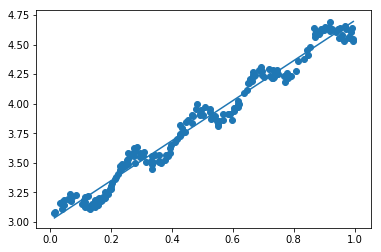

In [19]:
plt.show()

In [20]:
yHat = xMat * ws

In [21]:
np.corrcoef(yHat.T, yMat) #yHat和yMat的相关系数为0.98

array([[ 1.        ,  0.98647356],
       [ 0.98647356,  1.        ]])

### 2. 局部线性回归法

In [22]:
xArr, yArr = regression.loadDataSet('ex0.txt')

In [23]:
yArr[0]

3.176513

In [24]:
regression.lwlr(xArr[0], xArr, yArr, 1.0)

matrix([[ 3.12204471]])

In [25]:
regression.lwlr(xArr[0], xArr, yArr, 0.001)

matrix([[ 3.20175729]])

In [26]:
yHat = regression.lwlrTest(xArr, xArr, yArr, 1.0)

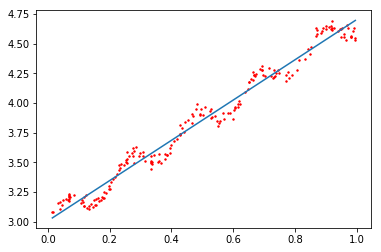

In [27]:
regression.drawFigure(xArr, yArr, yHat)

In [28]:
yHat = regression.lwlrTest(xArr, xArr, yArr, 0.01)

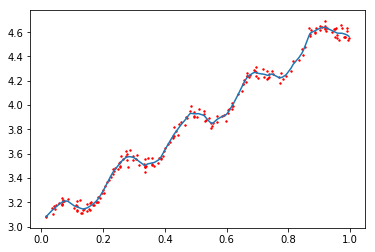

In [29]:
regression.drawFigure(xArr, yArr, yHat)

In [30]:
yHat = regression.lwlrTest(xArr, xArr, yArr, 0.003)

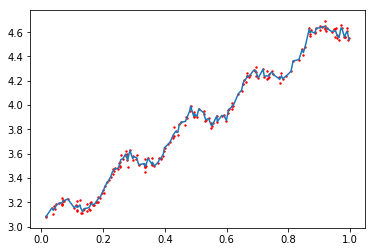

In [31]:
regression.drawFigure(xArr, yArr, yHat)

### 3. 预测鲍鱼年龄

In [32]:
abX, abY = regression.loadDataSet('abalone.txt')

In [33]:
yHat01 = regression.lwlrTest(abX[0:99], abX[0:99], abY[0:99], 0.1)

In [34]:
yHat1 = regression.lwlrTest(abX[0:99], abX[0:99], abY[0:99], 1)

In [35]:
yHat10 = regression.lwlrTest(abX[0:99], abX[0:99], abY[0:99], 10)

In [36]:
reload(regression)

<module 'regression' from 'regression.pyc'>

In [37]:
regression.rssError(abY[0:99], yHat01.T)

56.790348630125777

In [38]:
regression.rssError(abY[0:99], yHat1.T)

429.89056187011255

In [39]:
regression.rssError(abY[0:99], yHat10.T)

549.11817088275757

使用小的核函数得到的误差较低，会使得训练误差变小，但容易过拟合。

In [40]:
yHat01 = regression.lwlrTest(abX[100:199], abX[0:99], abY[0:99], 0.1)

In [41]:
yHat1 = regression.lwlrTest(abX[100:199], abX[0:99], abY[0:99], 1)

In [42]:
yHat10 = regression.lwlrTest(abX[100:199], abX[0:99], abY[0:99], 10)

In [43]:
regression.rssError(abY[100:199], yHat01.T)

34763.549819890402

In [44]:
regression.rssError(abY[100:199], yHat1.T)

573.52614418940152

In [45]:
regression.rssError(abY[100:199], yHat10.T)

517.57119053826784

从上面看出kernel size = 10时测试误差最小，在训练集上误差最大

In [46]:
ws = regression.standRegres(abX[0:99], abY[0:99])

In [47]:
yHat = np.mat(abX[100:199]) * ws

In [48]:
regression.rssError(abY[100:199], yHat.T.A)

518.63631532417139

### 4. 解决特征维数比样本数大的问题

在这种情况下，不能使用之前的方法。因为在求$(X^{T}X)^{-1}$的时候出错，矩阵是奇异矩阵，无法求逆。

#### 4. 1 岭回归

岭回归原理是在矩阵$X^{T}X$上加一个$\lambda I$使得矩阵非奇异，进而能对$X^{T}X+\lambda I$求逆。则新的回归系数计算公式变为如下：

$$\hat w = (X^{T}X+\lambda I)^{-1}X^{T}y$$

岭回归最先用来处理特征数多于样本数的情况，现在也用于**在估计中加入偏差**，从而得到更好的估计。这里通过引入$\lambda$来限制所有w之和，通过**引入该惩罚项**，能够减少不重要的参数，这种技术在统计学中称为**缩减(shrinkage)**。

岭回归需要对数据xMat和yMat都进行归一化（可以减均值除以方差）

In [49]:
reload(regression)

<module 'regression' from 'regression.pyc'>

In [50]:
abX, abY = regression.loadDataSet('abalone.txt')

In [51]:
ridgeWeights = regression.ridgeTest(abX, abY)

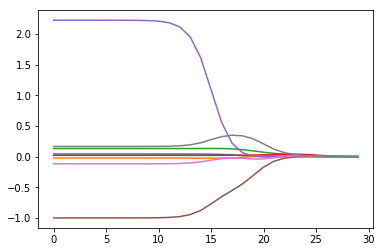

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)  #这里之所以显示8条线，原因是ax.plot在绘制2-D mat的时候，将会按列进行绘制
plt.show()

In [53]:
print np.shape(ridgeWeights)

(30, 8)


#### 4.2 lasso方法

lasso方法与岭回归方法的不同之处在于，岭回归相当于在求cost function的时候加上了w的平方项约束。
$$J(w) = (y - Xw)^{T}(y - Xw) + \lambda w^{T}w$$
而lasso的约束条件将平方和换成了绝对值，即
$$J(w) = (y - Xw)^{T}(y - Xw) + \lambda |w|$$
在$\lambda$足够小的时候，一些系数被迫缩减到0，这个特性可以帮助我们更好地理解数据。

#### 4.3 前向逐步回归法

该算法可得到与lasso差不多的效果，贪心算法（每一步都尽可能减少误差）。初始权重均为1，然后每步决策是对某个权重增加或减少一个很小的值。  
伪代码如下：

    数据标准化（使其分布满足0均值，单位方差）
    在每轮迭代过程中：
       设置当前最小误差lowestError为正无穷
       对每个特征：
         增大或缩小：
           改变一个系数得到一个新的W
           计算新W下的误差
           如果误差Error小于当前最小误差lowestError：设置Wbest等于当前W
         将W设置为新的Wbest

In [54]:
reload(regression)

<module 'regression' from 'regression.pyc'>

In [55]:
xArr, yArr = regression.loadDataSet('abalone.txt')

In [56]:
regression.stageWise(xArr, yArr, 0.01, 200) #步长太大，w0在0.04和0.05之间震荡

[[ 5.06631554]
 [-2.93368446]
 [-0.93368446]
 ..., 
 [-0.93368446]
 [ 0.06631554]
 [ 2.06631554]]
--------------
[[ 0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.    0.    0.    0.01  0.    0.    0.    0.  ]]
[[ 0.    0.    0.    0.02  0.    0.    0.    0.  ]]
[[ 0.    0.    0.    0.03  0.    0.    0.    0.  ]]
[[ 0.    0.    0.    0.04  0.    0.    0.    0.  ]]
[[ 0.    0.    0.    0.05  0.    0.    0.    0.  ]]
[[ 0.    0.    0.    0.06  0.    0.    0.    0.  ]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.  ]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.01]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.02]]
...
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ..., 
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])

In [57]:
regression.stageWise(xArr, yArr, 0.001, 5000)

[[ 5.06631554]
 [-2.93368446]
 [-0.93368446]
 ..., 
 [-0.93368446]
 [ 0.06631554]
 [ 2.06631554]]
--------------
[[ 0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.     0.     0.     0.001  0.     0.     0.     0.   ]]
[[ 0.     0.     0.     0.002  0.     0.     0.     0.   ]]
[[ 0.     0.     0.     0.003  0.     0.     0.     0.   ]]
[[ 0.     0.     0.     0.004  0.     0.     0.     0.   ]]
[[ 0.     0.     0.     0.005  0.     0.     0.     0.   ]]
[[ 0.     0.     0.     0.006  0.     0.     0.     0.   ]]
[[ 0.     0.     0.     0.007  0.     0.     0.     0.   ]]
[[ 0.     0.     0.     0.008  0.     0.     0.     0.   ]]
[[ 0.     0.     0.     0.009  0.     0.     0.     0.   ]]
...
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.04

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ..., 
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.044, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187]])

In [58]:
xMat = np.mat(xArr)
yMat = np.mat(yArr).T
xMat = regression.regularize(xMat)
yM = np.mean(yMat, 0)
yMat = yMat - yM
weights = regression.standRegres(xMat, yMat.T)
weights.T  #可见5000次迭代之后，逐步线性回归法与常规最小二乘法效果类似

matrix([[ 0.0430442 , -0.02274163,  0.13214087,  0.02075182,  2.22403814,
         -0.99895312, -0.11725427,  0.16622915]])

In [59]:
weights = regression.stageWise(xArr, yArr, 0.005, 1000)

[[ 5.06631554]
 [-2.93368446]
 [-0.93368446]
 ..., 
 [-0.93368446]
 [ 0.06631554]
 [ 2.06631554]]
--------------
[[ 0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.     0.     0.     0.005  0.     0.     0.     0.   ]]
[[ 0.    0.    0.    0.01  0.    0.    0.    0.  ]]
[[ 0.     0.     0.     0.015  0.     0.     0.     0.   ]]
[[ 0.    0.    0.    0.02  0.    0.    0.    0.  ]]
[[ 0.     0.     0.     0.025  0.     0.     0.     0.   ]]
[[ 0.    0.    0.    0.03  0.    0.    0.    0.  ]]
[[ 0.     0.     0.     0.035  0.     0.     0.     0.   ]]
[[ 0.    0.    0.    0.04  0.    0.    0.    0.  ]]
[[ 0.     0.     0.     0.045  0.     0.     0.     0.   ]]
...
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0

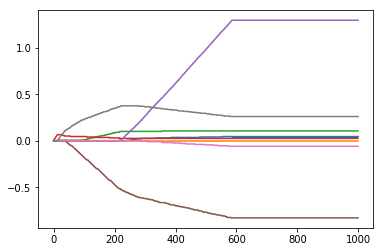

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(weights)
plt.show()

逐步线性回归法的一个好处是构建了模型之后，便于运行该算法**找出重要的特征**，这样就有可能及时停止对不重要特征的收集。  
应用这种缩减方法(岭回归或者逐步线性回归)会使模型增加bias(偏差)，减少variance(方差)。

#### 5. balance bias and variance

训练误差和测试误差由三个部分组成：偏差，测量误差和随机噪声。第2节和第3节通过引入3个越来越小的核不断增大模型方差。第4节的缩减法将一系列系数缩减成很小的值或直接缩减为0，这样会增大模型的偏差。

方差是模型之间的差异(模型之间参数的差异)，偏差是模型预测值和真实值之间的差异

#### 6. 预测乐高玩具价格

In [61]:
lgX = []
lgY = []

In [62]:
reload(regression)

<module 'regression' from 'regression.pyc'>

貌似API网址已经无法使用了，在使用urllib2.urlopen的时候会报错